<div>
<img src="https://www.nebrija.com/images/logos/logotipo-universidad-nebrija.jpg" width="200">
</div>

**ALGORITMOS** -
Prof: Carmen Pellicer Lostao

# Informacion Cuántica

En este notebook vemos los estados cuanticos y su representacion matemática,  como se describen los operadores cuanticos para la transformacion de estados y en general las herramientas que tenemos en Python para manipular la info cuantica.

En qiskit exite una libreria para trabajar con la [información cuántica](https://docs.quantum.ibm.com/api/qiskit/quantum_info)



Qiskit es una libreria que se apoya en la librería estandard de python y en las librerías de calculos numericos (como por ejemplot: [math](https://docs.python.org/3.10/library/math.html), [cmath](https://docs.python.org/3.10/library/cmath.html) y [numpy](https://numpy.org/doc/stable/user/index.html)). Veamos unos ejercicios basicos de python para manipular información cuántica.

## Informacion binaria en Python

#### EJERCICIO

Dada una cadena binaria '011001' de 6 bits codificada como $b_{n-1},b_{n-2}...b_1,b_0$ encontrar:

- el numero de bits que contiene
- el valor del bit más significativo  $b_5$
- el valor del bit menos significativo $b_0$
- el valor del bit $b_3$

Utilizando el direccionamiento de indices de empezando por la izquierda y por la derecha

In [1]:
bits='011001'
#indices empezando por la izq      012345
num_bits_izq = len(bits[::1])
bit_sig_izq = bits[0]
bit_nsig_izq = bits[-1]
bit3_izq = bits[2]

#indices empezando por la derecha -6-5-4-3-2-1
num_bits_der = len(bits[::-1])
bit_sig_der = bits[-1]
bit_nsig_der = bits[0]
bit3_der = bits[-4]

print(f"Número de bits (izquierda): {num_bits_izq}")
print(f"Bit más significativo (izquierda): {bit_sig_izq}")
print(f"Bit menos significativo (izquierda): {bit_nsig_izq}")
print(f"Bit en la posición 3 (izquierda): {bit3_izq}")

print(f"\nNúmero de bits (derecha): {num_bits_der}")
print(f"Bit más significativo (derecha): {bit_sig_der}")
print(f"Bit menos significativo (derecha): {bit_nsig_der}")
print(f"Bit en la posición 3 (derecha): {bit3_der}")

Número de bits (izquierda): 6
Bit más significativo (izquierda): 0
Bit menos significativo (izquierda): 1
Bit en la posición 3 (izquierda): 1

Número de bits (derecha): 6
Bit más significativo (derecha): 1
Bit menos significativo (derecha): 0
Bit en la posición 3 (derecha): 1


### EJERCICIO

Dada una lista de pyhton que contiene medidas de resultado de un circuito cuántico, calcular:

- Cuantas medidas hay en la lista
- La primera medida
- La ultima
- Si la cadena '01' esta en la lista
- Los resultados 50,51 y 52

In [2]:
data = ['00', '10', '00', '00', '00', '10', '11', '00', '11', '00', '00', '00', '00', '00', '00', '00', '00', '00', '11', '11', '00', '11', '10', '00', '00', '11', '00', '00', '11', '11', '10', '00', '11', '00', '10', '00', '00', '00', '11', '11', '11', '11', '00', '00', '00', '11', '00', '00', '00', '00', '01', '00', '01', '01', '11', '00', '00', '11', '11', '00', '11', '11', '00', '01', '11', '00', '00', '10', '11', '10', '10', '11', '11', '00', '11', '11', '10', '11', '11', '00', '11', '00', '11', '00', '11', '11', '11', '11', '11', '11', '00', '11', '11', '11', '11', '00', '11', '11', '01', '11']


In [3]:
# Cuántas medidas hay en la lista
cantidad_medidas = len(data)

# La primera medida
primera_medida = data[0]

# La última medida
ultima_medida = data[-1]

# Si la cadena '01' está en la lista
cadena_01_presente = '01' in data

# Los resultados 50, 51 y 52
resultado_50 = data[49]
resultado_51 = data[50]
resultado_52 = data[51]

# Imprimir los resultados
print(f"Cantidad de medidas: {cantidad_medidas}")
print(f"Primera medida: {primera_medida}")
print(f"Última medida: {ultima_medida}")
print(f"¿'01' está en la lista?: {cadena_01_presente}")
print(f"Resultado 50: {resultado_50}")
print(f"Resultado 51: {resultado_51}")
print(f"Resultado 52: {resultado_52}")


Cantidad de medidas: 100
Primera medida: 00
Última medida: 11
¿'01' está en la lista?: True
Resultado 50: 00
Resultado 51: 01
Resultado 52: 00


### EJERCICIO

Tenemos un diccionario que contiene el resultado de medidas de un circuito de 4 qubits.

Imprime por pantalla el valor de cada resultado de la forma:

```
resultado -- cuenta
0000      -- 106
0011      -- 141
0101      -- 125
0110      -- 135
1001      -- 136
1010      -- 135
1100      -- 104
1111      -- 142
```

In [4]:
counts={'1010': 135, '1111': 142, '0011': 141, '0110': 135, '0101': 125, '0000': 106, '1100': 104, '1001': 136}


In [5]:
# Imprimir el encabezado
print("resultado -- cuenta")

# Recorrer el diccionario y mostrar cada resultado y su cuenta
for resultado, cuenta in counts.items():
    print(f"{resultado} -- {cuenta}")

resultado -- cuenta
1010 -- 135
1111 -- 142
0011 -- 141
0110 -- 135
0101 -- 125
0000 -- 106
1100 -- 104
1001 -- 136


En python es importante que el codigo sea modular y reutilizable, por ello es importante utilizar **funciones**. Una funcion es un bloque de codigo que vamos a usar muchas veces y necesitamos definirlo aparte para poderlo llamar en cualquier momento. Las funciones evitan que repitamos el codigo muchas veces y permiten reutilizarlo, lo que reduce la longitud del codigo, lo hace menos repetitivo y mejora su mantenimiento.

Las funciones tomarán parametros de entrada, realizarán una operacion y pueden devolver un resultado. De esta forma cada vez que las llamamos haran una operacion en base a los parametros con las que la llamemos.

__Nota:__ En Python las `funciones` son objetos de clases primarias, lo que significa que:
 - Las funciones son objetos y pueden ser referenciados, pasados a una variable y retornados de como resultado de otra funcion
 - Las funciones pueden definirse dentro de otra funcion y tambien pasarse como argumentos de otra funcion.

### EJERCICIO


Tenemos un diccionario que contiene el resultado de medidas de un circuito de 4 qubits.

Haz una funcion llamada __count_to_digital_values__ que tome como argumento el resultado de medidas de un circuito de n qubits e imprima por pantalla el valor de cada resultado de la forma:

```
resultado -- cuenta
0000      -- 106
0011      -- 141
0101      -- 125
0110      -- 135
1001      -- 136
1010      -- 135
1100      -- 104
1111      -- 142
```

In [6]:
def count_to_digital_values(counts):
    # Imprimir el encabezado
    print("resultado -- cuenta")
    # Recorrer el diccionario y mostrar cada resultado y su cuenta
    for resultado, cuenta in counts.items():
        print(f"{resultado} -- {cuenta}")

In [7]:
resultados_counts={'1010': 135, '1111': 142, '0011': 141, '0110': 135, '0101': 125, '0000': 106, '1100': 104, '1001': 136}


In [8]:
count_to_digital_values(resultados_counts)

resultado -- cuenta
1010 -- 135
1111 -- 142
0011 -- 141
0110 -- 135
0101 -- 125
0000 -- 106
1100 -- 104
1001 -- 136


## Vectores y matrices en Python

### Librerias math

[math](https://docs.python.org/3.10/library/math.html)

#### EJERCICIO

Importa las librerias math y calcula: $\pi$, $\pi^2$ y $\frac{1}{\sqrt(2)}$

In [9]:
# OPERAIONES Y CONSTANTES MATEMATICAS
import math

print("Pi: ",math.pi)
print("Pi^2: ",math.pi**2)
print("1/sqrt(2): ",1/math.sqrt(2))

Pi:  3.141592653589793
Pi^2:  9.869604401089358
1/sqrt(2):  0.7071067811865475


#### EJERCICIO

Un vector de estados se define en la esfera de Bloch como:

$|\psi|= 𝑐𝑜𝑠(\frac{𝜃}{2}) |0> + 𝑠𝑖𝑛(\frac{𝜃}{2}) e^{i𝜙} |1>$

donde $𝜃∈[0,𝜋]$  y  $𝜙∈[0,2𝜋)$  son los angulos que el vector de estados forma con los ejes z, y, x respectivamente

y donde la ecuacion de Euler nos dice que $e^{i𝜙} = 𝑐𝑜𝑠(𝜙)+i 𝑠𝑖𝑛(𝜙)$

Utilizando las funciones de __acos__ y __asin__ de las librerias __math__ debes de obtener los angulos __theta 𝜃__ y __phi 𝜙__ para los siguientes vectores de estado de un qubit:

- |0>
- |+>
- |-i>

Puedes obtenerlos en radianes y en grados usando las funciones __math__ de conversion (__degrees__ y __radians__)

In [10]:
# OPERACIONES Y CONSTANTES MATEMATICAS
#calcula theta y psi para los siguientes estados en grados y radianes

print("Angulo: Rad | Deg")
#|0>
print("theta: ",math.radians(2*math.acos(1)),"|",math.degrees(2*math.acos(1)))
print("phi: - | -")

#|+>
print("theta: ",math.radians(2*math.acos(1/math.sqrt(2))),"|",math.degrees(2*math.acos(1/math.sqrt(2))))
print("phi: ",math.radians(math.acos(1)),"|",math.degrees(math.acos(1)))

#|-i>
print("theta: ",math.radians(2*math.acos(1/math.sqrt(2))),"|",math.degrees(2*math.acos(1/math.sqrt(2))))
print("phi: ",math.radians(math.asin(1)),"|",math.degrees(math.asin(1)))


Angulo: Rad | Deg
theta:  0.0 | 0.0
phi: - | -
theta:  0.027415567780803778 | 90.00000000000001
phi:  0.0 | 0.0
theta:  0.027415567780803778 | 90.00000000000001
phi:  0.027415567780803774 | 90.0


### Numeros complejos

Python soporta de manera nativa el tipo de datos de número complejo

#### EJERCICIO

Define un numero complejo en python que tenga parte real e imaginaria $\frac{1}{\sqrt(2)}$ utilizando la clase `complex()` de python.

Hax lo mismo utilizando el numero complejo `1j` o `1J` que en python es el numero imaginario `i`

Imprime por pantalla su valor y el tipo de dato que es (con la clase funcion `type()`)

In [11]:
#COMPLEJOS
#complex(a,b) es equivalente a+1j*b or a+1J*b
#----------------------------------------------

# 1/sqrt(2)
num = complex(1/math.sqrt(2),1/math.sqrt(2))
print(f"num: {num} {type(num)}")

# 1j
num2 = complex(0,1)
print(f"num2: {num2} {type(num2)}")

num: (0.7071067811865475+0.7071067811865475j) <class 'complex'>
num2: 1j <class 'complex'>


Imprime su parte real y su parte imaginaria con los metodos .`real()` e `.imag()`

In [12]:
#representacion parte real y parte imaginaria
print(num.real,num.imag)

0.7071067811865475 0.7071067811865475


#### EJERCICIO

Calcula las siguientes operaciones de numeros complejos:

*   $j + j$
*   $j * j$
*   $3+1j*3$
*   $(3+1j)*3$
*   $(3+1j)^{†}$



In [13]:
#operaciones de numeros complejos
resultado1 = 1j + 1j
print("1.", resultado1)

resultado2 = 1j * 1j
print("2.", resultado2)

resultado3 = 3+1j*3
print("3.", resultado3)

resultado4 = (3+1j)*3
print("4.", resultado4)

resultado5 = (3+1j).conjugate()
print("5.", resultado5)


1. 2j
2. (-1+0j)
3. (3+3j)
4. (9+3j)
5. (3-1j)


### Librerías cmath

[cmath](https://docs.python.org/3.10/library/cmath.html)

Con las funciones de __cmath__ podemos obtener diferentes parametros de un numero complejo, por ejemplo su modulo, fase, parte real e imaginaria...etc

#### EJERCICIO

Dado un numero compejo  $\frac{1}{\sqrt(2)}(|0>+|1>)$ en notacion cartesiana, pasalo a notacion polar e imprime su modulo y angulo (en radianes y grados)

Podemos utilizar dos funciones de la librería: `.polar()` o `.phase()` para obtener info sobre la representacion polar del numero complejo

In [14]:
#representacion polar con modulo y fase in the range [-π, π] radians or [-180, 180] degrees
import cmath
psi=1/math.sqrt(2)*complex(1,1)

#utilizando cmath.polar()
display(cmath.polar(psi))

#utilizando abs() y cmath.phase()
display(cmath.phase(psi))
display(abs(psi))


(0.9999999999999999, 0.7853981633974483)

0.7853981633974483

0.9999999999999999

Convierte el numero complejo anterior de notacion polar a cartesiana con la funcion de cmath `.rect()`

In [15]:
#convertir de representacion cartesiana a polar y viceversa
polar_psi = cmath.polar(psi)
print(f"Representacion polar: {polar_psi}\n Representacion cartesiana: {cmath.rect(polar_psi[0],polar_psi[1])}")

Representacion polar: (0.9999999999999999, 0.7853981633974483)
 Representacion cartesiana: (0.7071067811865475+0.7071067811865474j)


#### EJERCICIO

Dado el siguiente vector de estados de 1 qubit repreentado como una lista de python:

$[-0.12299+0.4936𝑖 , 0.82978+0.22954𝑖]$

Calcular la probabilidad de medir y obtener el estado |0> y el estado |1>

Comprobar que la probabilidad total medir cualquier estado es 1

In [16]:
psi= [-0.12299+0.4936*1j,0.82978+0.22954*1j]
amplitud_0= -0.12299+0.4936*1j
amplitud_1= 0.82978+0.22954*1j

#Recordar que la prob de medir un estado es el cuadrado de su amplitud
#puede calcularse como el cuadrado de su modulo -> abs(amplitud)
#puede calcularse como el cuadrado de su modulo -> cmath.polar(amplitud)[0]
#puede calcularse como la amplitud * su conjugado

print(f'PROBABILIDAD DE MEDIR |0>: {abs(amplitud_0)**2}')


print(f'\nPROBABILIDAD DE MEDIR |1>: {abs(amplitud_1)**2}')


print(f'\nPROBABILIDAD DE MEDIR |0> o |1>: {abs(amplitud_0)**2 + abs(amplitud_1)**2}')


PROBABILIDAD DE MEDIR |0>: 0.25876750009999994

PROBABILIDAD DE MEDIR |1>: 0.7412234599999998

PROBABILIDAD DE MEDIR |0> o |1>: 0.9999909600999998


#### EJERCICIO

Dado el siguiente vector de estados de 3 qubits :

$[-0.06591-0.16099𝑖, 0.1084+0.27375𝑖, 0.4534-0.053𝑖, -0.15738+0.70953𝑖, -0.04604-0.04858𝑖, -0.25711-0.14354𝑖, -0.16085-0.11673𝑖, -0.12249-0.02758𝑖]$

Calcular la probabilidad de medir y obtener el estado |000>

Comprobar que la probabilidad total medir cualquier estado es 1 utilizando un bucle __FOR__ y la funcion __range()__

In [17]:
psi= [-0.06591-0.16099*1j, 0.1084+0.27375*1j, 0.4534-0.053*1j, -0.15738+0.70953*1j, -0.04604-0.04858*1j, -0.25711-0.14354*1j, -0.16085-0.11673*1j, -0.12249-0.02758*1j]

#Recordar que la prob de medir un estado es el cuadrado de su amplitud
#puede calcularse como el cuadrado de su modulo -> abs(amplitud)
#puede calcularse como el cuadrado de su modulo -> cmath.polar(amplitud)[0]
#puede calcularse como la amplitud * su conjugado

amplitud_0= -0.06591-0.16099*1j
print(f'PROBABILIDAD |000>: {abs(amplitud_0)**2}')

prob_total = 0
for ind in range(len(psi)):
  prob_total += abs(psi[ind])**2

print(f'PROBABILIDAD total de medir cualquier estado: {prob_total}')


PROBABILIDAD |000>: 0.030261908200000003
PROBABILIDAD total de medir cualquier estado: 0.9999854296


### Librerías numpy

El modulo de python numerico [numpy](https://numpy.org/doc/stable/user/index.html) se utiliza extensivamente para realizar calculos.

Numpy permite vectorizar los calculos y los hace mas eficientes que trabajando con listas de numeros. También tiene bastante utilidad crear numeros aleatorios y para ello se utiliza las funcion random de este módulo

#### EJERCICIO

Utilizar las librerias numpy para calcular un numero entero aleatorio

In [18]:
import numpy as np

#Crear un numero entero entre 0 y 1 -> numero binario
print(f"Numero entero aleatorio entre 0 y 1: {np.random.randint(2)}")

# Generar un número entero aleatorio en el rango [0, 100)
print(f"Numero entero aleatorio entre 0 y 99: {np.random.randint(100)}")


Numero entero aleatorio entre 0 y 1: 1
Numero entero aleatorio entre 0 y 99: 26


#### EJERCICIO

Define dos **arrays** de numpy que sean el ket |0> y el ket |1>.

Calcula el vector de su promedio $\frac{1}{2}(|0> + |1>) $

In [19]:
# VECTORES Y OPERACIONES DE VECTORES

import numpy as np

# Create two arrays
array1 = np.array([1,0])
array2 = np.array([0,1])

# Calculate the average
average_result = 1/2*(array1+array2)

# Print the result
print("Array 1:", array1)
print("Array 2:", array2)
print("Average:", average_result)

Array 1: [1 0]
Array 2: [0 1]
Average: [0.5 0.5]


#### EJERCICIO

Define dos matrices en Numpy y calcula su promedio:

*  $M1=
\begin{equation}
\begin{bmatrix}
1 & 1\\
0 & 0
\end{bmatrix}
\end{equation}$

* $M2=
\begin{equation}
\begin{bmatrix}
1 & 1\\
1 & 0
\end{bmatrix}
\end{equation}$

In [20]:
M1 = np.array([[1,1],[0,0]])
M2 = np.array([[1,1],[1,0]])

average_m= 1/2*(M1+M2)

print(M1)
print(M2)
print(average_m)

[[1 1]
 [0 0]]
[[1 1]
 [1 0]]
[[1.  1. ]
 [0.5 0. ]]


#### EJERCICIO

Calcula las siguientes operaciones de multiplicacion con la funcion `matmul()`de numpy:

* $M1 * |1>$
* $M1*M2$
* $M2*M1$


In [21]:
from numpy import matmul

ket1=np.array([0,1])

print('𝑀1∗|1>',matmul(M1,ket1))

print('𝑀1∗𝑀2',matmul(M1,M2))

print('𝑀2∗𝑀1',matmul(M2,M1))

𝑀1∗|1> [1 0]
𝑀1∗𝑀2 [[2 1]
 [0 0]]
𝑀2∗𝑀1 [[1 1]
 [1 1]]


## Vectores y Operadores en Qiskit

Qiskit incluye varias clases que permiten crear y manipular fácilmente estados, mediciones y operaciones, por lo que no es necesario comenzar desde cero y programar todo lo necesario para simular estados, mediciones y operaciones cuánticas en Python. A continuación se incluyen algunos ejemplos para comenzar.

En qiskit exite una libreria para trabajar con la [información cuántica](https://docs.quantum.ibm.com/api/qiskit/quantum_info)

### Estados cuanticos

La clase [Statevector](https://docs.quantum.ibm.com/api/qiskit/qiskit.quantum_info.Statevector) de Qiskit proporciona funcionalidad para definir y manipular vectores de estado cuánticos.

#### EJERCICIO

Importa la clase Statevector y define los siguientes vectores:

* $\frac{1}{\sqrt(2)}(|0>+|1>)$
* $\frac{1+2j}{3} |0>+ \frac{-2}{3} |1>$
* $\frac{1}{3}|0>+\frac{1}{3}|1>$



In [22]:
from qiskit.quantum_info import Statevector
from numpy import sqrt

u = Statevector([1/sqrt(2),1/sqrt(2)])
v = (1 + 2j) / 3 * Statevector([1,0]) + (-2 / 3) * Statevector([0,1])
w = Statevector([1/3,1/3])

print(f"u: {u}\nv: {v}\nw: {w}")

u: Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))
v: Statevector([ 0.33333333+0.66666667j, -0.66666667+0.j        ],
            dims=(2,))
w: Statevector([0.33333333+0.j, 0.33333333+0.j],
            dims=(2,))


#### EJERCICIO

Utiliza los metodos de la clase state vector para contruir el conjugado de uno de los anteriores estados e imprimir una visualizacion en latex y en texto del estado.

Utiliza el metodo `.draw()`de la clase `Statevector` para ver la visualizacion

Comprueba si el estado es valido

In [23]:
v.draw(output="latex")

<IPython.core.display.Latex object>

#### EJERCICIO

Crea unos vectores de estados a partir de las etiquetas: 0,1, +, -

Utiliza el método `.from_label()`de la clase `Statevector()`



In [24]:
vector0 = Statevector.from_label("0")
vector1 = Statevector.from_label("1")
vectormas = Statevector.from_label("+")
vectormenos = Statevector.from_label("-")
print(vector0,vector1,vectormas,vectormenos)

Statevector([1.+0.j, 0.+0.j],
            dims=(2,)) Statevector([0.+0.j, 1.+0.j],
            dims=(2,)) Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,)) Statevector([ 0.70710678+0.j, -0.70710678+0.j],
            dims=(2,))


#### EJERCICIO

Utiliza el metodo `.measure()` de la clase `Statevector()` que te permite simular una unica medida sobre un estado de los anteriores

In [25]:
vectormas.measure()

('0',
 Statevector([1.+0.j, 0.+0.j],
             dims=(2,)))

#### EJERCICIO

Utiliza el metodo `.sample_counts()` que te permite realizar varias medidas y realiza por ejemplo 1000

Importa la funcion `plot_histogram()` de qiskit y representa el histograma de resultados obtenidos

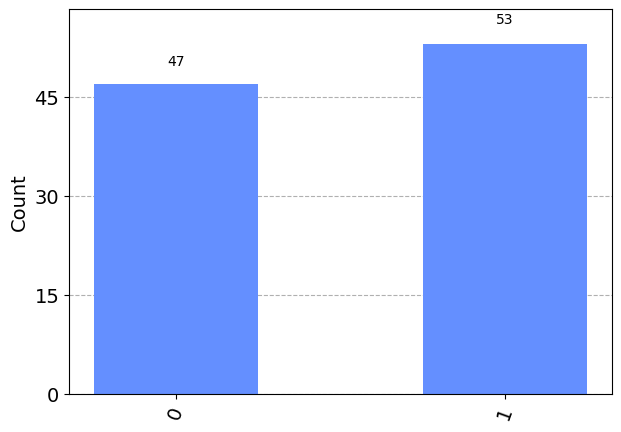

In [26]:
from qiskit.visualization import plot_histogram
counts = vectormas.sample_counts(100)
plot_histogram(counts)

#### EJERCICIO

Crea el vector de estados $\frac{\sqrt(3)}{3}∣001⟩+\frac{\sqrt(3)}{3}∣010⟩+\frac{\sqrt(3)}{3}∣101⟩$  y mide el qbit 0

Ejecuta la celda varias veces o mide varias veces y razona los resultados


In [27]:
qubit = sqrt(3)/3*(Statevector.from_label("001")+Statevector.from_label('010')+Statevector.from_label('101'))
qubit.measure()

('010',
 Statevector([0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
              0.+0.j],
             dims=(2, 2, 2)))

#### EJERCICIO

Calcula el producto tensorial de los estados:
* |0> $\bigotimes$ |1>
* |+> $\bigotimes$ $\frac{1}{\sqrt(2)}(|0>+|1>)$)

Utilizando el metodo `.tensor()` de la clase `StateVector()`

In [28]:
tensor1 = Statevector.tensor(vector0,vector1)
tensor2 = Statevector.tensor(vectormas,1/sqrt(2)*(vector0+vector1))
display(tensor1.draw("latex"))
display(tensor2.draw("latex"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Operadores

Las operaciones unitarias se pueden definir y realizar en vectores de estado en Qiskit usando la clase [Operador](https://docs.quantum.ibm.com/api/qiskit/qiskit.quantum_info.Operator)

#### EJERCICIO

Define los operadores X, Y, Z, H, S, T con la clase `Operador()` a partir las matrices unitarias que los definen.

Aplicalos al ket |0> con el metodo `.evolve()` de la clase `StateVector()` para ver el resultado de la evolucion de este estado bajo cada operador.

In [29]:
from qiskit.quantum_info import Operator
X = Operator.from_label("X")
Y = Operator.from_label("Y")
Z = Operator.from_label("Z")
H = Operator.from_label("H")
S = Operator.from_label("S")
T = Operator.from_label("T")

v = Statevector([1,0]) # Ket 0
print(f"Aplicando H: {v.evolve(H)}")

Aplicando H: Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


Imprime el valor de los operadores anteriores con el metodo `.to_matrix()`

In [30]:
gates = [X,Y,Z,H,S,T]
for puerta in gates:
  display(puerta.draw("latex"))
  print("\n")

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

#### EJERCICIO

Construye el Operador de la puerta CX, aplicalo al estado $$|\psi> = |+> \bigotimes\frac{1}{\sqrt(2)}(|0>+|1>))$$ y calcula el resultado de la evolucion que se obtiene:

In [31]:
plus = Statevector.from_label("+")
i_state = Statevector.tensor(plus,plus)
CX = Operator([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]])

display(i_state.evolve(CX).draw("latex"))


<IPython.core.display.Latex object>

#### EJERCICIO

Define los operadores X e I y calcula su producto tensorial $X \bigotimes I$.

Utilizando el metodo `.tensor()`de la clase `Operator()` o la operacion`^` que es equivalente

In [32]:
X=Operator.from_label("X")
I=Operator.from_label("I")

tensor_operador = Operator.tensor(X,I)
display(tensor_operador.draw("latex"))


<IPython.core.display.Latex object>

#### EJERCICIO

Utilizando el metodo `.evolve()` de la clase `StateVector` podemos evolucionar un vector de estados con un circuito. Pasando el circuito como parametro del metodo.

Define un circuito de 1 qubit que aplique la puerta H al ket |0> para ver el reusltado de la evolucion de este estado bajo este circuito.

Haz 4000 simulaciones de medida y representa el histograma resultado

┌───┐
q: ┤ H ├
   └───┘

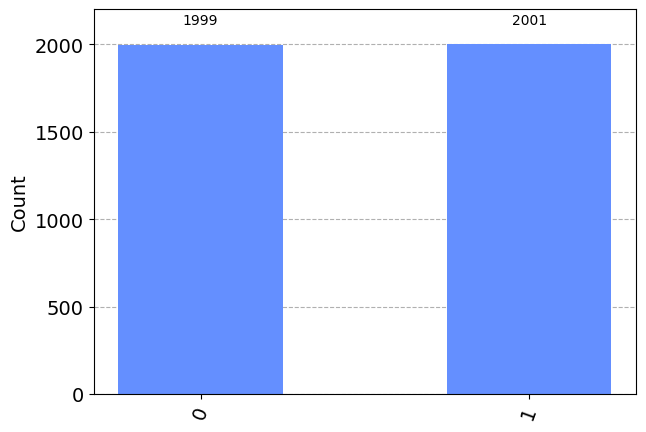

In [33]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram

circuit = QuantumCircuit(1)
circuit.h(0)
display(circuit.draw())

ket0 = Statevector.from_label("0")
counts = ket0.evolve(circuit).sample_counts(4000)
plot_histogram(counts)

#### EJERCICIO

Construye los siguientes operadores utilizando el metodo `.from_label()` de la clase `Operator()`:

- Z
- H
- T

Informacion de etiquetas para las [matrices de un qubit](https://docs.quantum.ibm.com/api/qiskit/qiskit.quantum_info.Operator#from_label): ‘I’: [[1, 0], [0, 1]] ‘X’: [[0, 1], [1, 0]] ‘Y’: [[0, -1j], [1j, 0]] ‘Z’: [[1, 0], [0, -1]] ‘H’: [[1, 1], [1, -1]] / sqrt(2) ‘S’: [[1, 0], [0 , 1j]] ‘T’: [[1, 0], [0, (1+1j) / sqrt(2)]] ‘0’: [[1, 0], [0, 0]] ‘1’: [[0, 0], [0, 1]] ‘+’: [[0.5, 0.5], [0.5 , 0.5]] ‘-’: [[0.5, -0.5], [-0.5 , 0.5]] ‘r’: [[0.5, -0.5j], [0.5j , 0.5]] ‘l’: [[0.5, 0.5j], [-0.5j , 0.5]]

In [34]:
z=Operator.from_label("Z")

h=Operator.from_label("H")

t=Operator.from_label("T")

#### EJERCICIO

Explora las operaciones de los operadores:

- [@ composicion](https://docs.quantum.ibm.com/api/qiskit/qiskit.quantum_info.Operator#compose)
- [dot producto](https://docs.quantum.ibm.com/api/qiskit/qiskit.quantum_info.Operator#dot)
- [tensor producto](https://docs.quantum.ibm.com/api/qiskit/qiskit.quantum_info.Operator#tensor)

La composicion es multiplicacion por la izquierda A & B == A.compose(B) y es equivalente a B @ A == B.dot(A) para matrices A y B del mismo tipo.

Realiza los siguientes calculos:

- H&T  -> H & T == H.compose(T)
- T@H  -> T @ H == T.dot(H)
- Z^Z


In [35]:
H = Operator.from_label("H")
T = Operator.from_label("T")

display(Operator.compose(H,T).draw("latex"))
print("\n")

display(Operator.dot(T,H).draw("latex"))
print("\n")

Z = Operator.from_label("Z")

display((Z^Z).draw("latex"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### OptFlow

Qiskit [OptFlow](https://docs.quantum.ibm.com/api/qiskit/opflow) proporciona clases que representan estados y operadores y sumas, productos tensoriales y composiciones de los mismos. Estas construcciones algebraicas nos permiten construir expresiones que representen operadores.

Los [operadores globales](https://docs.quantum.ibm.com/api/qiskit/opflow#operator-globals) que estan definidos en esta librería son los estados y los operadores de las puertas mas relevantes

Utilizamos los siguientes operadores matemáticos para construir operadores y estados con OptFlow a partir de los operadores globales:

```
+ - addition
- - subtraction, negation (scalar multiplication by -1)
* - scalar multiplication
/ - scalar division
@ - composition
^ - tensor product or tensor power (tensor with self n times)
** - composition power (compose with self n times)
== - equality
~ - adjoint, alternating between a State Function and Measurement
```

__Nota__: es importante tener en cuenta la precedencia de las operaciones en Python y utilizar paréntesis para asegurarnos de que se realizan correctamente. Por ejemplo , `I^X+X^I` es equivalente a `I^(X+X)^I=2(I^X^I)` porque la operacion `+` tiene precedencia sobre el producto tensorial `^` . Tambien no hay que olvidar que el numero complejo imaginario `i` se escribe `1j` en Python.




#### EJERCICIO

Utiliza los estados `One` y `Minus` de la lirería OptFlow para calcular los siguientes vectores de estado y proyecciones:

- |1>
- |->
- <1|1>
- <-|1>

Utiliza el metodo `.eval()` para obtener el valor de las proyecciones

In [36]:
from qiskit.opflow import One, Minus

print(One)
print((~One@One).eval())

DictStateFn({'1': 1})
1.0


/tmp/ipykernel_8041/3815921991.py:1: DeprecationWarning: The ``qiskit.opflow`` module is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/opflow_migration.
  from qiskit.opflow import One, Minus


#### EJERCICIO

Utiliza los operadores de Pauli de la librería OptFlow para construir los siguientes operadores:

- la base de matrices de Pauli
- dos operadores escalera: $\hat{\sigma}^{+} = \frac{ \hat{\sigma}_x + i \hat{\sigma}_y}{2}$ y $\hat{\sigma}^{-} = \frac{\hat{\sigma}_x - i \hat{\sigma}_y}{2}$
- El Hamiltoniano de Heisenberg para dos qubits: $ \hat{H} = \frac{1}{2} \left( \hat{I}\otimes \hat{I} +  \hat{\sigma}_x \otimes \hat{\sigma}_x + \hat{\sigma}_y \otimes \hat{\sigma}_y + \hat{\sigma}_z \otimes \hat{\sigma}_z \right) $

Utiliza los metodos `.to_matrix()` y `.to_circuit()` para visualizar los operadores obtenidos


In [37]:
from qiskit.opflow import I, X, Y, Z

display(((X+1J*Y)/2).to_matrix())
display(((X-1J*Y)/2).to_matrix())

display((1/2*(I^I + X^X + Y^Y + Z^Z)).to_matrix())


array([[0.+0.j, 1.+0.j],
       [0.+0.j, 0.+0.j]])

array([[0.+0.j, 0.+0.j],
       [1.+0.j, 0.+0.j]])

array([[0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       ...,
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]])